<a href="https://colab.research.google.com/github/WendyNi98/STAT3612/blob/master/Project_Master_Branch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STAT3612 Final Project

In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## Members:

| Name | UID |
| :----- | :--------|
|Fu Zhifeng | 3035335428 |
|Lu Xinyu | 3035335076 |
|Ni Haotian | 3035330260 |
|Zhou Tianming | 3035446904 |

<!--
Fu Zhifeng &nbsp; 3035335428 <br/>
Lu Xinyu &nbsp; 3035335076 <br/>
Ni Haotian &nbsp; 3035330260 <br/>
Zhou Tianming 3035446904
-->

## Introduction
HELOC, short for home equity line of credit, is a kind of loan where lenders agree to lend within a maximum amount of money and an agreed period of time. Borrower use their houses as collateral in exchange for the loan. For HELOC lenders, it has been an important issue to predict the capabilities of borrowers to pay off the debt. The data set used in this report includes the risk flag showing debt paid or not as the label, together with 23 features that potentially indicate the risk of issuing HELOC.

## Import data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [29]:
heloc = pd.read_csv("HelocData.csv")
heloc.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75,169,2,59,21,0,0,100,-7,...,36,-7,4,4,43,112,4,6,0,83
1,Bad,66,502,4,145,34,0,0,97,36,...,27,4,3,3,80,53,17,3,12,83
2,Good,69,338,2,62,22,0,0,96,12,...,35,0,4,4,25,100,3,2,1,45
3,Good,75,422,1,91,55,0,0,100,-7,...,33,0,4,4,2,11,12,2,1,57
4,Bad,63,242,2,68,25,0,0,100,-7,...,19,-7,3,3,73,-8,12,1,5,87


In [30]:
data_dict = pd.read_excel("HelocDataDict2.xlsx",index_col=0)
var_names = data_dict['Description'].apply(
    lambda x: x.split('.')[0] if '.' in x else x)[1:] # Only extract the first sentence

#pd.options.display.max_colwidth = 100  # show complete variable names
var_names.to_frame()

,Description
Variable Names,
x1,Consolidated version of risk markers
x2,Months Since Oldest Trade Open
x3,Months Since Most Recent Trade Open
x4,Average Months in File
x5,Number Satisfactory Trades
x6,Number Trades 60+ Ever
x7,Number Trades 90+ Ever
x8,Percent Trades Never Delinquent
x9,Months Since Most Recent Delinquency


## Data exploration
### Missing value information

In [31]:
#delete the records which are all empty
emptyRecords = heloc[heloc[heloc.isin([-7, -8, -9])].apply(lambda x: x.count(), axis=1) == 23].index
helocClean = heloc.drop(emptyRecords)
NotApplicable = (helocClean.isin([-7])).sum()/heloc.shape[0]
NoUsable = (helocClean.isin([-8])).sum()/heloc.shape[0]
NoRecord = (helocClean.isin([-9])).sum()/heloc.shape[0]
missingFrequency = pd.concat([NotApplicable, NoUsable, NoRecord], axis = 1)[1:]
print(missingFrequency)#.apply(lambda x: format(x, '.2%')))

            0         1         2
x1   0.000000  0.000000  0.000956
x2   0.000000  0.022851  0.000000
x3   0.000000  0.000000  0.000000
x4   0.000000  0.000000  0.000000
x5   0.000000  0.000000  0.000000
x6   0.000000  0.000000  0.000000
x7   0.000000  0.000000  0.000000
x8   0.000000  0.000000  0.000000
x9   0.445932  0.016828  0.000000
x10  0.000000  0.000000  0.000000
x11  0.000000  0.000000  0.000000
x12  0.000000  0.000000  0.000000
x13  0.000000  0.000000  0.000000
x14  0.000000  0.000000  0.000000
x15  0.177359  0.045511  0.000000
x16  0.000000  0.000000  0.000000
x17  0.000000  0.000000  0.000000
x18  0.000000  0.017784  0.000000
x19  0.000000  0.326895  0.000000
x20  0.000000  0.014915  0.000000
x21  0.000000  0.082321  0.000000
x22  0.000000  0.055741  0.000000
x23  0.000000  0.001721  0.000000


### Correlation information 

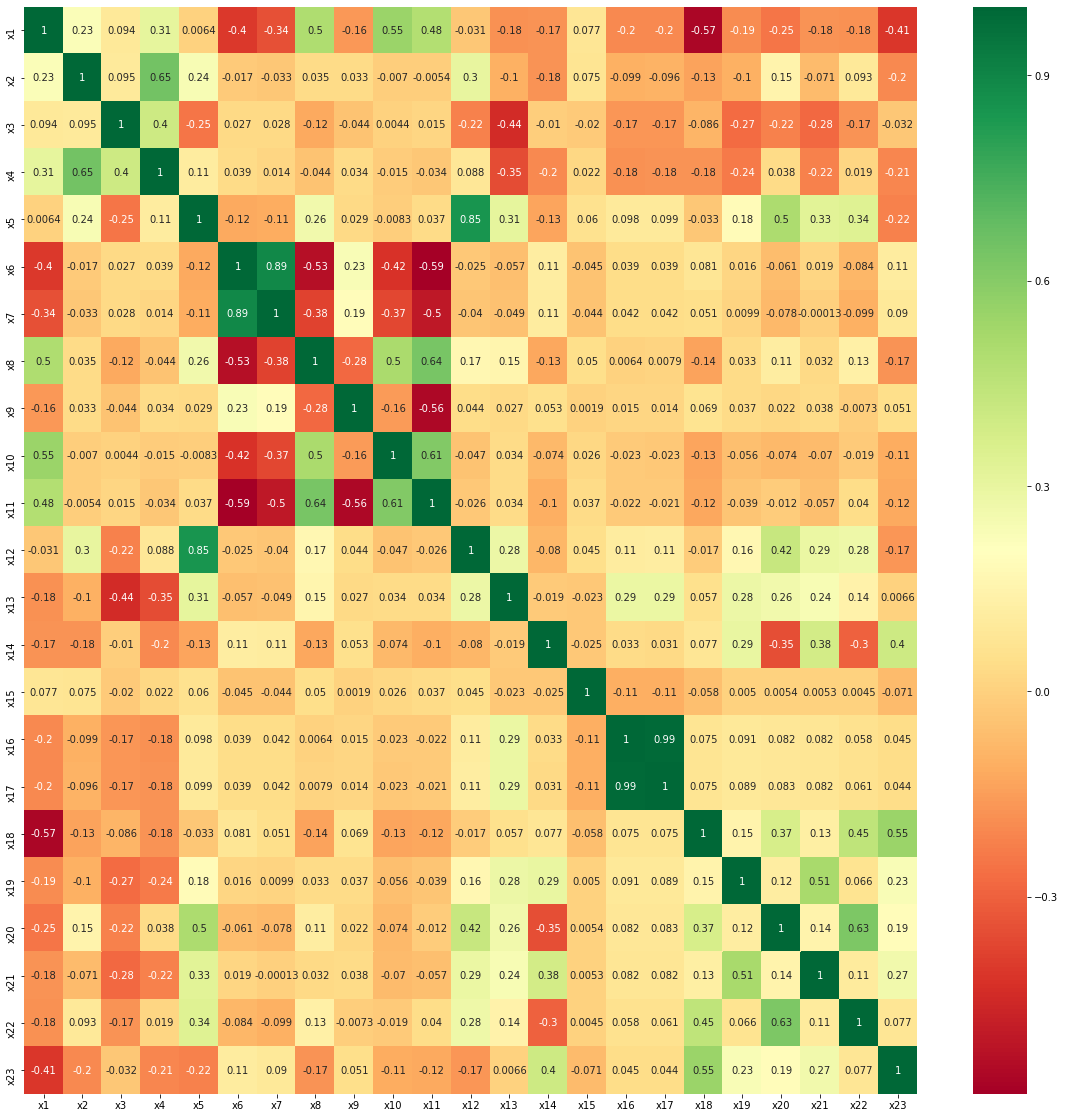

In [6]:
corrmat = helocClean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(helocClean[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Significant correlations: 
* x16, x17 (0.99): No. inq. last 6 months. x17 exclude 7 days.
* x6, x7 (0.89): No. trades ever, 60+ / 90+
* x5, x12 (0.85): No. satisfactory trades / No. total trades -> pct of satisfactory trades
* x8, x11 (0.64): Pct trades never delinq. / MaxDelq ever
* x10, x11 (0.61): Max delinq last 12 months / max delinq. ever
* x1, x18 (-0.57): Consolidated version of risk markers / Net Fraction Revolving Burden

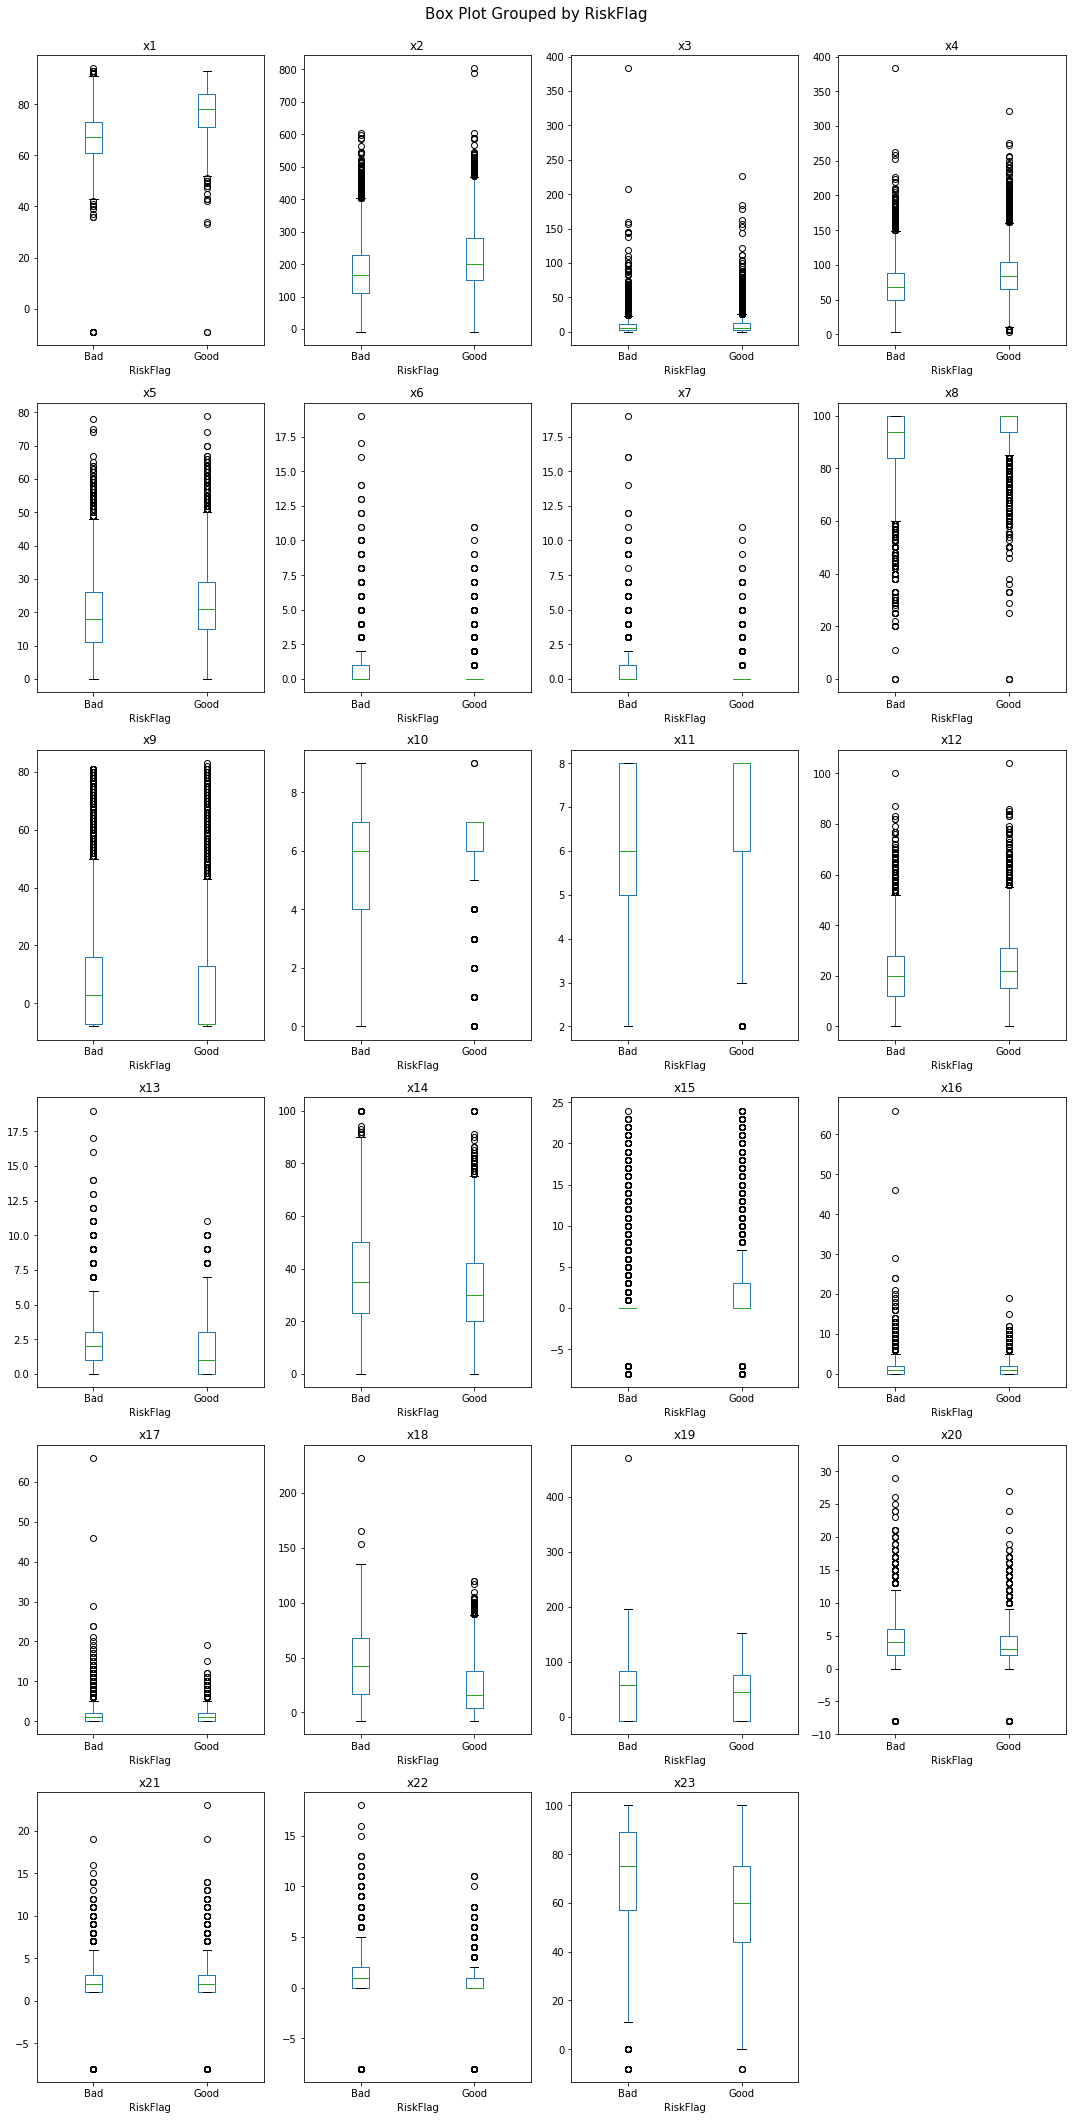

In [7]:
cols = 4 # change `clos` to get other layout
rows = (heloc.shape[1]-1)//cols + 1  # Floor division

# First figure: the boxplot with fliers
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
for i in range(rows):
    for j in range(cols):
        var_idx = cols*i+j+1
        try:
            helocClean[:].boxplot(column='x'+str(var_idx), by='RiskFlag',
                                      grid=False, ax=axes[i, j])
        except:
            axes[i, j].axis('off')  # make the remaining axes empty

plt.suptitle('Box Plot Grouped by RiskFlag', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Individual variables

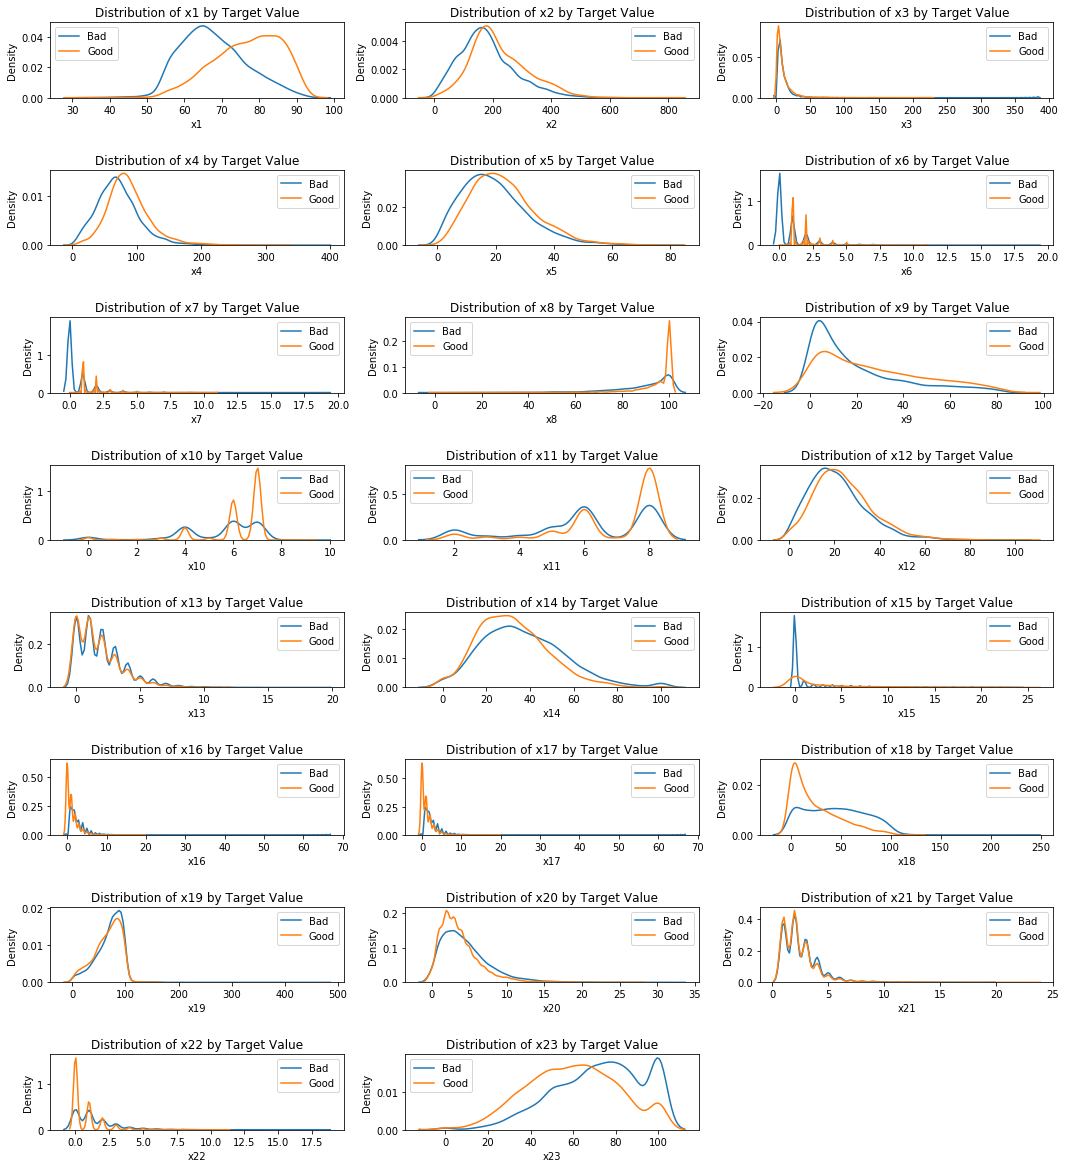

In [32]:
helocClean.replace([-7,-8, -9], np.nan, inplace=True)
plt.figure(figsize=(15,20))
for i, feature in enumerate(helocClean.columns.drop('RiskFlag')):
    plt.subplot(10, 3, i + 1)
    sns.kdeplot(helocClean.loc[helocClean['RiskFlag'] == 'Bad', feature], label = 'Bad')
    sns.kdeplot(helocClean.loc[helocClean['RiskFlag'] == 'Good', feature], label = 'Good')
    
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

Intuitions form the plot:
* **x1**
* x4, longer file history, less risk
* x6,x7, bad risk has more zero trade
* **x8**, good risk has significantly more 100% never delinquent
* **x9**, bad risk tend to have shorter months since last delinq.
* x10, good risk have more "current and never delinq." and "unknown" and "30 days" (shorter)
* x11, same as above
* x14, good risk have lower pct installment trades
* **x15**, bad risk have significantly more "0 Months Since Most Recent Inq excl 7days"
* x16, x17, good risk have less number of inq.
* **x18**, good risk have significantly lower fraction of revolving burden
* x22, good risk have less Number Bank/Natl Trades w high utilization ratio
* **x23**, good risk have lower Percent Trades with Balance

## Imputation

In [8]:
from sklearn.model_selection import train_test_split

X = heloc.drop(['RiskFlag'],axis=1)
X = X.drop('x19',axis=1) # too many missing values
y = heloc['RiskFlag'].copy()

# drop empty records
emptyRecords = X[X[X.isin([-7, -8, -9])].apply(lambda x: x.count(), axis=1) == X.shape[1]].index
X.drop(emptyRecords,inplace=True)
y.drop(emptyRecords,inplace=True)

# As there are cases that "number of xxx trades"<x12"number of total trades", impute x12 with max of them.
#X['x12']= X.apply(lambda row: max(row.x5,row.x6,row.x7,row.x12,row.x13), axis=1)

# Create a new row for fraction of satisfactory trades, x5/x12
#X['x5pct']=X.x5/X.x12 # this step will reduce corr(5,12)=0.9 to corr(5pct,12)=-0.07
# np.corrcoef(X.x5,X.x12)
#X = X.drop('x5',axis=1)

# Deal with -7 Not Applicable for x9 and x15, create flag rows
def impute7(X):
    # create new row for -7: no delinquincies/no inquiries
    X['x9na']=X['x9']==-7
    X['x15na']=X['x15']==-7
    X['x9na'] = X['x9na'].astype(int)
    X['x15na'] = X['x15na'].astype(int)
    
    # impute special values for -7 situation
    X.loc[X['x9']==-7,'x9']=999 #X['x9'].max() == 83
    X.loc[X['x15']==-7,'x15']=999 # X['x15'].max()= 24
impute7(X)

X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x15,x16,x17,x18,x20,x21,x22,x23,x9na,x15na
0,75,169,2,59,21,0,0,100,999,7,...,999,4,4,43,4,6,0,83,1,1
1,66,502,4,145,34,0,0,97,36,6,...,4,3,3,80,17,3,12,83,0,0
2,69,338,2,62,22,0,0,96,12,6,...,0,4,4,25,3,2,1,45,0,0
3,75,422,1,91,55,0,0,100,999,7,...,0,4,4,2,12,2,1,57,1,0
4,63,242,2,68,25,0,0,100,999,7,...,999,3,3,73,12,1,5,87,1,1


In [9]:
seed = np.random.seed(20190018)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [10]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')
imp_frequent = SimpleImputer(strategy = 'most_frequent')
import sys
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

def impute7_train(X):
    # create new row for -7: no delinquincies/no inquiries
    X['x9na']=X['x9']==-7
    X['x15na']=X['x15']==-7
    X['x9na'] = X['x9na'].astype(int)
    X['x15na'] = X['x15na'].astype(int)
    
    # impute special values for -7 situation
    X.loc[X['x9']==-7,'x9']=999 #X['x9'].max() == 83 # subject to changes according to model types?
    X.loc[X['x15']==-7,'x15']=999 # X['x15'].max()= 24
    
def impute7_test(X):
    impute7_train(X)

In [11]:
def impute89_train(X,method='mean'):
    X.replace([-8, -9], np.nan, inplace=True)
    if method=='mean':
        imputed = imp_mean.fit_transform(X)
    if method=='median':
        imputed = imp_median.fit_transform(X)
    if method=='frequent':
        imputed = imp_frequent.fit_transform(X)
    if method=='fast_knn':
        imputed = fast_knn(X.values,k=30)
    if method=='mice':
        imputed= mice(X.values)
    imputed = pd.DataFrame(imputed)
    imputed.columns = X.columns
    imputed.index = X.index
    return imputed
def impute89_test(X,method='mean'):
    X.replace([-8, -9], np.nan, inplace=True)
    if method=='mean':
        imputed = imp_mean.transform(X)
    if method=='median':
        imputed = imp_median.transform(X)
    if method=='frequent':
        imputed = imp_frequent.transform(X)
    if method=='fast_knn':
        imputed = fast_knn(X.values,k=30)
    if method=='mice':
        imputed= mice(X.values)
    imputed = pd.DataFrame(imputed)
    imputed.columns = X.columns
    imputed.index = X.index
    return imputed

def preprocess_train_X(X,method):
    #impute7_train(X)
    X = impute89_train(X,method=method)
    return X

def preprocess_test_X(X,method):
    #impute7_test(X)
    X = impute89_test(X,method=method)
    return X

In [12]:
train_X_full = preprocess_train_X(train_X,method='fast_knn')
test_X_full = preprocess_test_X(test_X,method='fast_knn')

In [13]:
train_X_full.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x15,x16,x17,x18,x20,x21,x22,x23,x9na,x15na
9695,56.0,172.00000,5.0,84.0,21.0,2.0,2.0,88.0,2.0,1.0,...,3.000000,2.0,2.0,41.0,10.0,4.0,2.000000,88.0,0.0,0.0
7303,76.0,109.00000,10.0,50.0,14.0,0.0,0.0,100.0,999.0,7.0,...,0.000000,2.0,2.0,0.0,0.0,2.0,0.101669,40.0,1.0,0.0
9608,91.0,215.00000,19.0,98.0,13.0,0.0,0.0,100.0,999.0,7.0,...,197.799973,0.0,0.0,0.0,1.0,1.0,0.000000,25.0,1.0,0.0
819,54.0,194.93584,32.0,61.0,9.0,1.0,1.0,78.0,1.0,0.0,...,999.000000,1.0,1.0,77.0,3.0,1.0,2.000000,100.0,0.0,1.0
5316,67.0,196.00000,2.0,56.0,27.0,0.0,0.0,90.0,13.0,6.0,...,2.000000,3.0,3.0,45.0,8.0,3.0,2.000000,67.0,0.0,0.0


In [14]:
train_y = train_y.replace({'Bad':1,'Good':0})
test_y = test_y.replace({'Bad':1,'Good':0})

# Feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(train_X_full,train_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_X_full.columns)
#concat two dataframes for better visualization 
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns = ['Specs','Score']  #naming the dataframe columns
print("By Chi-square :")
print(feature_scores.nlargest(10,'Score'))  #print 10 best features
features_chi2 = feature_scores.nlargest(10,'Score')['Specs']

By Chi-square :
   Specs          Score
8     x9  207569.435966
14   x15   26224.843130
17   x18   23407.125775
1     x2   16580.157354
3     x4    6761.981270
21   x23    4226.251870
0     x1    2231.070979
13   x14    1354.361763
4     x5    1006.409415
20   x22     870.832853


In [16]:
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(train_X_full,train_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_X_full.columns)
#concat two dataframes for better visualization 
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns = ['Specs','Score']  #naming the dataframe columns
print("By ANOVA F-value :")
print(feature_scores.nlargest(10,'Score'))  #print 10 best features
features_anova = feature_scores.nlargest(10,'Score')['Specs']

By ANOVA F-value :
   Specs        Score
0     x1  2079.500068
17   x18  1136.639317
21   x23   623.259979
7     x8   546.860770
3     x4   486.854452
9    x10   473.834630
8     x9   463.703914
22  x9na   454.703806
20   x22   433.762757
10   x11   411.723450


In [17]:
features_intuition = ['x1','x4','x6','x8','x9','x10','x14','x15','x16','x18','x22','x23','x5pct']

In [18]:
selected_features = features_chi2 ##
train_X = train_X_full[selected_features]
test_X = test_X_full[selected_features]

# Models

In [7]:
model_accuracy = pd.DataFrame(columns = ["Model Name", "Training Accuracy", "Testing Accuracy"])

### Logistic

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e8, solver='newton-cg')
logreg.fit(train_X, train_y)
print('Intercept:', *np.round(logreg.intercept_, 4), '\n'
      'Coefficients:', *np.round(np.squeeze(logreg.coef_), 4))

Intercept: 6.614 
Coefficients: -0.0003 0.0003 0.0079 -0.0007 -0.0064 -0.0031 -0.0765 0.0071 -0.0316 0.1139


In [27]:
train_pred_logreg = logreg.predict(train_X)
test_pred_logreg = logreg.predict(test_X)

model_accuracy.loc[0]=["Logistic Regression", accuracy_score(train_pred_logreg, train_y), accuracy_score(test_pred_logreg, test_y)]
print('The accuracy on the train set is: {}'.format(accuracy_score(train_pred_logreg, train_y).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_pred_logreg, test_y).round(5)))

The accuracy on the train set is: 0.7286
The accuracy on the test set is: 0.7281


### GAM

In [23]:
from pygam import LogisticGAM, s
from sklearn.preprocessing import KBinsDiscretizer

train_X_EFB = pd.DataFrame()      #create the empty dataframe to store the transformed training set
test_X_EFB = pd.DataFrame()       #create the empty dataframe to store the transformed testing set
est_train = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
est_test = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
for feature in selected_features:
    z_train = pd.DataFrame(est_train.fit_transform(train_X[feature][:,np.newaxis]))
    z_test = pd.DataFrame(est_test.fit_transform(test_X[feature][:,np.newaxis]))
    """
    print(feature)
    print(np.quantile(X[feature].values, np.linspace(0, 1, 6)))
    print("Bin Edges", est_train.bin_edges_[0])
    """
    train_X_EFB[feature] = z_train[0]       #store the transformed training set
    test_X_EFB[feature] = z_test[0]         #store the transformed testing set
    """
    print(x_EWB_train.loc[:5])              #preview of the transformed training set
    plt.figure(figsize=(4,3))
    x_train[feature].hist(grid=False,density=True)
    for x in est_train.bin_edges_[0]:
        plt.axvline(x,color='r')
        plt.title(feature ,fontsize=12)
    plt.show()
    """

gam = LogisticGAM().fit(train_X_EFB, train_y)
train_pred_gam = gam.predict(train_X_EFB)
test_pred_gam = gam.predict(test_X_EFB)
model_accuracy.loc[1]=["GAM", accuracy_score(train_pred_gam, train_y), accuracy_score(test_pred_gam, test_y)]
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred_gam).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_gam).round(5)))

The accuracy on the train set is: 0.73518
The accuracy on the test set is: 0.73165


In [26]:
from pygam import LogisticGAM, s
n_splines = [10, 20, 30, 40]
spline_order = [1, 3, 5, 10]

best_i = 10
best_j = 1
best_accuracy = 0

for i in n_splines:
    for j in spline_order:
        if (i > j):
            
            p_spl = LogisticGAM(s(0, n_splines = i, spline_order = j, penalties = 'derivative') + s(1, n_splines = i, spline_order = j, penalties = 'derivative')
                        + s(2, n_splines = i, spline_order = j, penalties = 'derivative') + s(3, n_splines = i, spline_order = j, penalties='derivative')
                       + s(4, n_splines = i, spline_order = j, penalties='derivative') + s(5, n_splines = i, spline_order = j, penalties = 'derivative')
                           + s(6, n_splines = i, spline_order = j, penalties = 'derivative') + s(7, n_splines = i, spline_order = j, penalties = 'derivative')
                           + s(8, n_splines = i, spline_order = j, penalties = 'derivative') + s(9, n_splines = i, spline_order = j, penalties = 'derivative'))
            p_spl.gridsearch(train_X.values,train_y)
            train_pred = p_spl.predict(train_X)
            test_pred = p_spl.predict(test_X)
            if accuracy_score(test_pred, test_y)>best_accuracy:
                print('n_splines:',i,', spline_order:',j)
                print('The accuracy on the train set is: {}'.format(accuracy_score(train_pred, train_y).round(5)))
                print('The accuracy on the test set is: {}'.format(accuracy_score(test_pred, test_y).round(5)))
                best_i = i
                best_j = j
                best_accuracy = accuracy_score(test_pred, test_y)

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

n_splines: 10 , spline_order: 1
The accuracy on the train set is: 0.73898
The accuracy on the test set is: 0.74228


100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (11 of 11) |########################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08
100% (11 of 11) |########################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (11 of 11) |########################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (11 of 11) |########################| Elapsed Time: 0:00:12 Time:  0:00:12
100% (11 of 11) |########################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (11 of 11) |########################| Elapsed Time: 0:00:16 Time:  0:00:16
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

n_splines: 30 , spline_order: 5
The accuracy on the train set is: 0.7386
The accuracy on the test set is: 0.74278


100% (11 of 11) |########################| Elapsed Time: 0:00:23 Time:  0:00:23
100% (11 of 11) |########################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (11 of 11) |########################| Elapsed Time: 0:00:27 Time:  0:00:27
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

n_splines: 40 , spline_order: 3
The accuracy on the train set is: 0.74012
The accuracy on the test set is: 0.7438


100% (11 of 11) |########################| Elapsed Time: 0:00:29 Time:  0:00:29
100% (11 of 11) |########################| Elapsed Time: 0:00:31 Time:  0:00:31


In [34]:
# Tuned model

from pygam import LogisticGAM, s

i = 40 # n_splines
j = 3 # spline_order
p_spl = LogisticGAM(s(0, n_splines = i, spline_order = j, penalties = 'derivative') + s(1, n_splines = i, spline_order = j, penalties = 'derivative')
                    + s(2, n_splines = i, spline_order = j, penalties = 'derivative') + s(3, n_splines = i, spline_order = j, penalties='derivative')
                    + s(4, n_splines = i, spline_order = j, penalties='derivative') + s(5, n_splines = i, spline_order = j, penalties = 'derivative')
                    + s(6, n_splines = i, spline_order = j, penalties = 'derivative') + s(7, n_splines = i, spline_order = j, penalties = 'derivative')
                    + s(8, n_splines = i, spline_order = j, penalties = 'derivative') + s(9, n_splines = i, spline_order = j, penalties = 'derivative'))
p_spl.fit(train_X,train_y)
train_pred_pspl = p_spl.predict(train_X)
test_pred_pspl = p_spl.predict(test_X)
model_accuracy.loc[2]=["GAM with tuned splines", accuracy_score(train_pred_pspl, train_y), accuracy_score(test_pred_pspl, test_y)]
print('The accuracy on the train set is: {}'.format(accuracy_score(train_pred_pspl, train_y).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_pred_pspl, test_y).round(5)))

The accuracy on the train set is: 0.74278
The accuracy on the test set is: 0.73468


### Neural Network

In [38]:
from sklearn.neural_network import MLPClassifier

max_iter = [100, 500, 1000, 2000, 5000]
random_state = [42, 80, 100, 300, 500, 1000]

best_iter = 0
best_random = 0
best_train_accuracy = 0
best_test_accuracy = 0

for i in max_iter:
    for j in random_state:
        mlp = MLPClassifier(max_iter=i, random_state=j)
        mlp.fit(train_X, train_y)
        train_pred_mlp = mlp.predict(train_X)
        test_pred_mlp = mlp.predict(test_X)
        if (accuracy_score(test_y, test_pred_mlp)>best_test_accuracy):
            best_iter = i
            best_random = j
            best_train_accuracy = accuracy_score(train_y,train_pred_mlp)
            best_test_accuracy = accuracy_score(test_y, test_pred_mlp)
            
print('max_iter:', best_iter, ', random_state:', best_random)
model_accuracy.loc[3]=["Neural Network", best_train_accuracy, best_test_accuracy]
print('The accuracy on the train set is: {}'.format(best_train_accuracy.round(5)))
print('The accuracy on the test set is: {}'.format(best_test_accuracy.round(5)))

max_iter: 100 , random_state: 300
The accuracy on the train set is: 0.71745
The accuracy on the test set is: 0.70684


### Neural network
Need dropout layer, or will seriously overfit...

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
nn = Sequential()
nn.add(Dense(30, activation='relu', input_dim=train_X.shape[1]))
nn.add(Dropout(0.2))
nn.add(Dense(100, activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(100, activation='relu'))
nn.add(Dense(1,activation='sigmoid'))
         
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
nn.fit(train_X, train_y, epochs=300, batch_size=100,verbose=0)

In [68]:
accuracy = nn.evaluate(test_X, test_y)

1975/1975 [==============================] - 0s 80us/sample - loss: 0.5745 - accuracy: 0.7306


In [69]:
train_pred_nn = nn.predict(train_X)>=0.5
test_pred_nn = nn.predict(test_X)>=0.5
model_accuracy.loc[3]=["Neural Network", accuracy_score(train_y, train_pred_nn), accuracy_score(test_y, test_pred_nn)]
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred_nn).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_nn).round(5)))

The accuracy on the train set is: 0.74202
The accuracy on the test set is: 0.73063


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)
train_pred_dt = dt.predict(train_X)
test_pred_dt = dt.predict(test_X)
model_accuracy.loc[4]=["Decision Tree Classifier", accuracy_score(train_pred_dt, train_y), accuracy_score(test_pred_dt, test_y)]
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y,train_pred_dt).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_dt).round(5)))

The accuracy on the train set is: 1.0
The accuracy on the test set is: 0.64051


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_X, train_y)
test_pred = rf.predict(train_X)
test_pred = rf.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y,train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

The accuracy on the train set is: 0.70225
The accuracy on the test set is: 0.72759


In [49]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [500,2000,5000]#[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']
# max depth
max_depth = [5,10,30]#[int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth}
# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=20090018, n_jobs = -1)

rf_random.fit(train_X, train_y)
print(rf_random.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 13.4min finished


{'n_estimators': 2000, 'max_features': 'sqrt', 'max_depth': 10}


In [51]:
# Tuned model

rf = RandomForestClassifier(n_estimators=2000, max_depth=10, max_features='sqrt')
rf.fit(train_X, train_y)
train_pred_rf = rf.predict(train_X)
test_pred_rf = rf.predict(test_X)
model_accuracy.loc[5]=["Random Forest Classifier", accuracy_score(train_pred_rf, train_y), accuracy_score(test_pred_rf, test_y)]
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y,train_pred_rf).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_rf).round(5)))

The accuracy on the train set is: 0.85613
The accuracy on the test set is: 0.73063


### SVM

#### Linear SVC

In [62]:
from sklearn.svm import LinearSVC

linSVC = LinearSVC()
linSVC.fit(train_X, train_y)
train_pred_linsvc = linSVC.predict(train_X)
test_pred_linsvc = linSVC.predict(test_X)
model_accuracy.loc[6]=["Linear SVC", accuracy_score(train_pred_linsvc, train_y), accuracy_score(test_pred_linsvc, test_y)]
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y,train_pred_linsvc).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_linsvc).round(5)))

The accuracy on the train set is: 0.54901
The accuracy on the test set is: 0.56861


In [60]:
linSVC_EFB = LinearSVC()
linSVC_EFB.fit(train_X_EFB, train_y)
train_pred_EFB = linSVC.predict(train_X_EFB)
test_pred_EFB = linSVC.predict(test_X_EFB)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred_EFB).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_EFB).round(5)))

The accuracy on the train set is: 0.52267
The accuracy on the test set is: 0.51089


#### RBF SVC

In [63]:
from sklearn.svm import SVC

# fit the model with RBF kernel
rbfSVC = SVC(gamma='auto',kernel='rbf')
rbfSVC.fit(train_X, train_y)

train_pred = rbfSVC.predict(train_X)
test_pred = rbfSVC.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

The accuracy on the train set is: 1.0
The accuracy on the test set is: 0.51089


In [57]:
#SVC hyperparameter tuning
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['rbf'], 'gamma': np.logspace(-4,0,5),
                     'C': [1, 10, 100, 1000]}
clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(train_X, train_y)
print('Best Parameters:',clf.best_params_)

train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))



'''
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['rbf'], 'gamma': np.logspace(-4,0,5),
                     'C': [1, 10, 100, 1000]}

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
skf = StratifiedKFold()
search_svc = RandomizedSearchCV(SVC(), param_distributions=tuned_parameters, n_iter=5, scoring='accuracy', n_jobs=-1, cv=skf.split(train_X,train_y), verbose=3)
search_svc.fit(train_X,train_y)
print(search_svc.best_params_)
train_pred = search_svc.predict(train_X)
test_pred = search_svc.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))



Best Parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
The accuracy on the train set is: 0.74265
The accuracy on the test set is: 0.71595


In [60]:
# Tuned model

rbfSVC = SVC(gamma = 0.0001, C = 1,kernel='rbf')
rbfSVC.fit(train_X, train_y)
train_pred_rbfSVC = rbfSVC.predict(train_X)
test_pred_rbfSVC = rbfSVC.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred_rbfSVC).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_rbfSVC).round(5)))

The accuracy on the train set is: 0.74265
The accuracy on the test set is: 0.71595


In [109]:
#feature engineering

def PieceReLU(x, tau):
    xphi = x
    for k in range(len(tau)):
        tmp = [max(x1 - tau[k], 0) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    return xphi

def PieceLinearSpline(x, tau):
    xphi = [min(max(x1 - min(x), 0), tau[0] - min(x)) for x1 in x]
    for k in range(1, len(tau)):
        tmp = [min(max(x1 - tau[k - 1], 0), tau[k] - tau[k - 1]) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    xphi = np.column_stack((xphi, [min(max(x1 - tau[len(tau) - 1], 0), max(x) - tau[len(tau) - 1]) for x1 in x]))
    return xphi

In [110]:
k = 5
train_X_relu = pd.DataFrame()     #create the empty dataframe to store the transformed training set
test_X_relu = pd.DataFrame()      #create the empty dataframe to store the transformed testing set
for feature in selected_features:
    tmp_train = pd.DataFrame(PieceReLU(train_X[feature], np.linspace(train_X[feature].min(), train_X[feature].max(), k+2)[1:-1]))
    train_X_relu = pd.concat([train_X_relu, tmp_train], axis = 1)     #merge the transformed training data
    tmp_test = pd.DataFrame(PieceReLU(test_X[feature], np.linspace(test_X[feature].min(), test_X[feature].max(), k+2)[1:-1]))
    test_X_relu = pd.concat([test_X_relu, tmp_test], axis = 1)        #merge the transformed testing data

In [111]:
rbfSVC_relu = SVC(gamma = 0.0001, C = 1)
rbfSVC_relu.fit(train_X_relu, train_y)
train_pred_rbfSVC_relu = rbfSVC_relu.predict(train_X_relu)
test_pred_rbfSVC_relu = rbfSVC_relu.predict(test_X_relu)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred_rbfSVC_relu).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_rbfSVC_relu).round(5)))

The accuracy on the train set is: 0.75849
The accuracy on the test set is: 0.71544


### Ensemble Learning

In [67]:
from sklearn.ensemble import VotingClassifier

ens1 = VotingClassifier(estimators=[('rbfSVC_', rbfSVC), ('rf', rf), ('gam', gam)], voting='hard')
ens1.fit(train_X, train_y)
train_pred = ens1.predict(train_X)
test_pred = ens1.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

The accuracy on the train set is: 0.78331
The accuracy on the test set is: 0.72


In [68]:
from sklearn.ensemble import BaggingClassifier
#from sklearn import model_selection

num_trees = 100
ens2 = BaggingClassifier(base_estimator=rbfSVC, n_estimators=num_trees, random_state=7)
ens2.fit(train_X, train_y)
train_pred = ens2.predict(train_X)
test_pred = ens2.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

The accuracy on the train set is: 0.74455
The accuracy on the test set is: 0.71392


In [69]:
num_trees = 100
ens3 = BaggingClassifier(base_estimator=logreg, n_estimators=num_trees, random_state=7)
ens3.fit(train_X, train_y)
train_pred = ens3.predict(train_X)
test_pred = ens3.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

The accuracy on the train set is: 0.72923
The accuracy on the test set is: 0.72861


### SVC

In [71]:
#SVC hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['rbf'], 'gamma': np.logspace(-4,0,5),
                     'C': [1, 10, 100, 1000]}
#svc = GridSearchCV(SVC(), tuned_parameters, cv=5,
 #                      scoring='accuracy')

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
skf = StratifiedKFold()
search_svc = RandomizedSearchCV(SVC(), param_distributions=tuned_parameters, n_iter=5, scoring='accuracy', n_jobs=-1, cv=skf.split(train_X,train_y), verbose=3)
search_svc.fit(train_X,train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   12.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.6s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001E2F9A6A8B8>,
                   error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=3)

### XGBoost

In [80]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
tuned_parameters={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
skf = StratifiedKFold()
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,silent=True)
random_search = RandomizedSearchCV(xgb, param_distributions=tuned_parameters, n_iter=5, scoring='accuracy', n_jobs=-1, cv=skf.split(train_X,train_y), verbose=3)

random_search.fit(train_X.values, train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    5.8s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    8.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    9.7s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001E2FB0EAA20>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=None,
                                           o...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='warn',

In [81]:
print(random_search.best_params_)
train_pred = random_search.predict(train_X.values)
test_pred = random_search.predict(test_X.values)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 0.6}
The accuracy on the train set is: 0.75101
The accuracy on the test set is: 0.74228


In [84]:
# Tuned model

xgb = XGBClassifier(learning_rate=0.02, gamma=5,subsample=0.6,colsample_bytree=0.6,
                    n_estimators=600, max_depth=3, min_child_weight=1,
                    silent=True)
xgb.fit(train_X.values,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [85]:
# with chisq variables, no imputations on x12

train_pred_xgb = xgb.predict(train_X.values)
test_pred_xgb = xgb.predict(test_X.values)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred_xgb).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred_xgb).round(5)))

The accuracy on the train set is: 0.75101
The accuracy on the test set is: 0.74228


In [112]:
num_trees = 100
ens4 = BaggingClassifier(base_estimator=xgb, n_estimators=num_trees, random_state=7)
ens4.fit(train_X, train_y)
train_pred = ens4.predict(train_X)
test_pred = ens4.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

The accuracy on the train set is: 0.75355
The accuracy on the test set is: 0.73975


# Post-hoc

In [113]:
model = xgb # [logreg,p_spl, dt, rf, linSVC_EFB, rbfSVC,rbfSVC_relu,ens1,ens2,ens3,ens4,nn]:
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, model.predict(train_X.values)).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, model.predict(test_X.values)).round(5)))

The accuracy on the train set is: 0.75101
The accuracy on the test set is: 0.74228


### Variable Importance

In [114]:
import eli5
from eli5.sklearn import PermutationImportance
# define a permutation importance object
perm = PermutationImportance(model).fit(test_X.values, test_y)
# show the importance
features = selected_features.to_numpy()
eli5.show_weights(perm, feature_names=features)

Using TensorFlow backend.


Weight,Feature
0.0750 ± 0.0099,x1
0.0259 ± 0.0078,x15
0.0123 ± 0.0063,x5
0.0114 ± 0.0062,x9
0.0102 ± 0.0100,x4
0.0094 ± 0.0074,x18
0.0021 ± 0.0039,x2
0.0018 ± 0.0052,x14
0.0011 ± 0.0049,x22
0.0005 ± 0.0020,x23


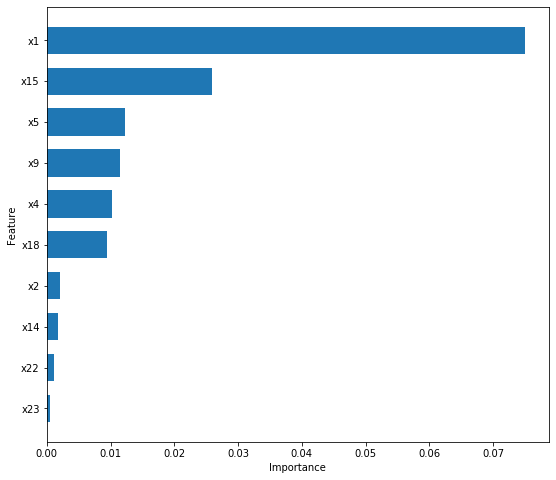

In [115]:
# importance in decreasing order
imp_ord = np.argsort(perm.feature_importances_)

plt.figure(figsize=(9,8))
yaxis = np.arange(len(perm.feature_importances_))*1.2
plt.barh(y = yaxis,width = perm.feature_importances_[imp_ord])
plt.yticks(yaxis,features[imp_ord])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

We can see from the above plots of variable importance that the features that have the greatest influence on the result of the prediction in the selected model is the mean area(with VI around 0.2), followed by mean concave points and mean texture.

### Partial Dependence Plot

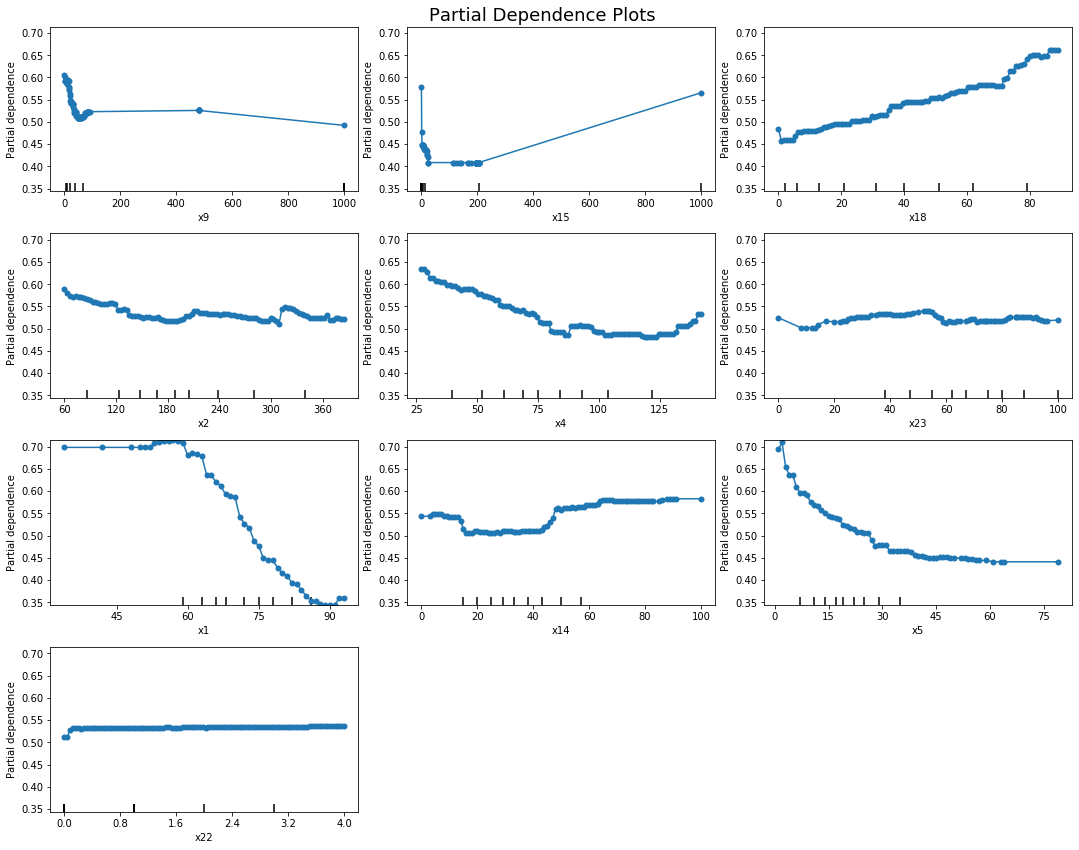

In [116]:
from sklearn.inspection import plot_partial_dependence as pdp
n_cols = 3
n_rows = features.shape[0]//n_cols + 1

fig = plt.figure(figsize=(15, 3*n_rows))
pdp(model, test_X.values, features=features, feature_names=features,
    n_cols=n_cols, fig=fig, line_kw={'marker': 'o', 'markeredgecolor': 'None'})

plt.suptitle('Partial Dependence Plots', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])

The partial dependence plots show that the mean texture, mean area, mean concavity and mean concave points have clear negative correlations with the possibility of the breast cancer cells being benign, while mean radius has a positive correlation.

### SHAP

In [ ]:
import shap
shap.initjs()
# define the explainer
explainer = shap.TreeExplainer(model)
# calculate the shape value
shap_values = explainer.shap_values(test_X)

### Force Plot

### Local Interpretability

In [ ]:
i = 3
# force plot
shap.force_plot(explainer.expected_value, shap_values[i,:], test_X[i],feature_names=features)

A sample from the dataset shows how the model works: mean area and mean perimeter contribute to the malignant side with great importance, while mean concave points and mean concavity contribute to the benign side with great importance. The predicted result of the model is malignant.

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, test_X,feature_names=features)

### Summary Plots

In [ ]:
shap.summary_plot(shap_values, feature_names=features, plot_type='bar')

In [ ]:
shap.summary_plot(shap_values, test_X,feature_names=features)

### InterpretML

In [ ]:
from interpret.perf import RegressionPerf
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

blackbox_perf = RegressionPerf(model.predict).explain_perf(test_X, test_y, name='Gradient Boosting')
iplot(blackbox_perf.visualize())

The plot above shows that the model fits the training set very well with $R^2 = 1$ .